<left><img width=100% height=100% src="img/itu_logo.png"></left>

## Lecture 14: Hierarchical Clustering

### __Gül İnan__<br><br>Istanbul Technical University

<br>

<br>

# Hierarchical Clustering

## Motivation

- One potential **disadvantage** of **K-means** clustering is that it requires us to **pre-specify** the number of clusters $K$.

## Hierarchical Clustering

- `Hierarchical clustering` techniques are a second important category of clustering methods in practice.
- There are two ways for generating a hierarchical clustering:

   - `Agglomerative`: Start with the points as individual clusters and, at each step, merge the closest pair of clusters.
   - `Divisive`: Start with one, all-inclusive cluster and, at each step, split a cluster until only singleton clusters of individual points remain.
   
-  `Agglomerative` hierarchical clustering techniques are by far the most common, and, we will focus on it only.

## Example

To illustrate the behavior of `Agglomerative` hierarchical clustering algorithms, let's use a synthetic data collected on two features for n=6 observations.

In [1]:
import numpy as np
import pandas as pd

data = {'x1': [0.40,0.21,0.35,0.26,0.08,0.45],
        'x2': [0.53,0.38,0.32,0.19,0.41,0.30]}


df = pd.DataFrame(data, index = ["p1","p2","p3","p4","p5","p6"])

df

,x1,x2
p1,0.40,0.53
p2,0.21,0.38
p3,0.35,0.32
p4,0.26,0.19
p5,0.08,0.41
p6,0.45,0.30


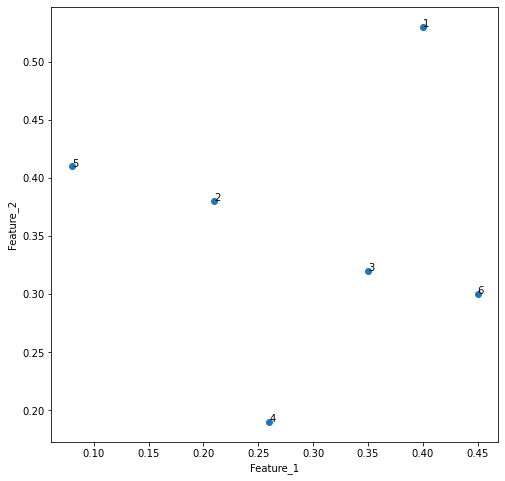

In [2]:
#visualize the data
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 8))

plt.scatter(df["x1"],df["x2"])
for i in range(1,7):
    plt.annotate(i, (df["x1"][i-1], df["x2"][i-1]))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show();

Question: How can we cluster these 6 points via `agglomerative algorithm`?

## Agglomerative Clustering

- `Agglomerative algorithm` starts at the **bottom** by treating **each observation** as a **cluster**.
- Then, it recursively **merges** a selected **pair of clusters** into a **bigger cluster**.
- The **selected pair of clusters** has the **smallest dissimilarity** (that's most similar) measure among all possible pairs.
- In other words, each time it **merges** two most similar clusters, until there is **only one cluster left**.


| ![space-1.jpg](img/linkage1.png)|
|:--:|
|<b>A nested Cluster Diagram</b>|


## Dendrograms
-  **Hierarchical** clustering has an added **advantage over** **K-means** clustering such that it results in an attractive **tree-based** representation of the observations, called `dendrogram`.
- Dendrograms are generally displayed as an **upside-down tree** which shows both the cluster-subcluster relationships and the order in which the clusters are merged.
- We can draw a dendogram of our data using [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram) function from [`scipy.cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). 

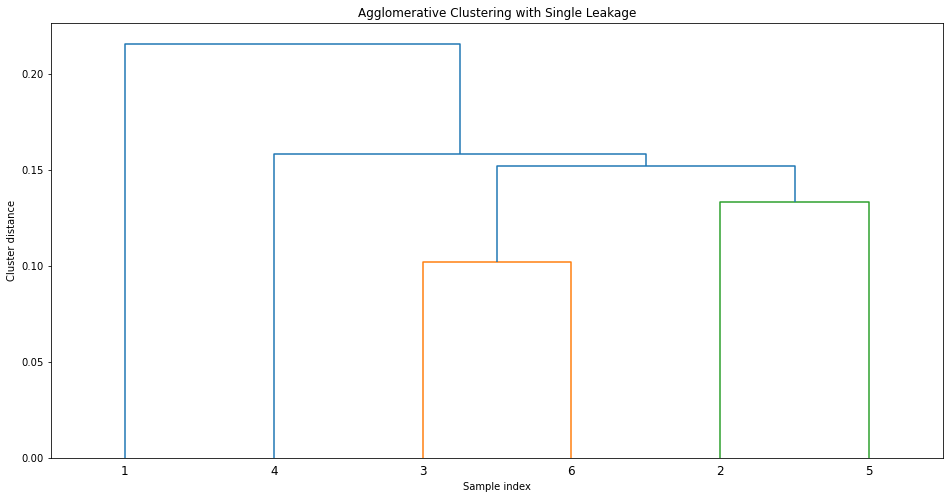

In [3]:
#play with method='single', 'complete', 'average', ’ward’
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(16, 8))

#first calculate the linkage matrix and apply the dendrogram on the linkage matrix

Z = linkage(df, method='single', metric='euclidean')

dn = dendrogram(Z, labels=np.arange(1,7))
plt.title("Agglomerative Clustering with Single Leakage")
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show();

| ![space-1.jpg](img/linkage1.png) |
|:--:|
| <b>Single Link Clustering</b>|

## Interpretation of Dendrogram

- As we can see, dendrogram is a **tree-like** plot, and 
each **leaf** of the dendogram represents one of the 6 observations. 
- However, as we move up the
tree, some leaves begin to **fuse (join)** into branches. 
- These correspond to **observations** that are **similar**
to each other. 
- As we move higher up the three, branches also fuse (join), either with leaves or other branches.
- The earlier fusions occur, the more similar the groups of observations are to each other.
    - For example, we can see that the minimum **euclidean distance** is between the points 3 and 6, that's 0.10, and they fuse into a branch at the earliest. Similarly, the second minimum **euclidean distance** is between the points 2 and 5, that's 0.14, and they fuse into a branch at the earliest too. 

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

dist = pd.DataFrame(euclidean_distances(df),index=np.arange(1,7), columns=np.arange(1,7))
dist.round(4)

,1,2,3,4,5,6
1,0.0000,0.2421,0.2159,0.3677,0.3418,0.2354
2,0.2421,0.0000,0.1523,0.1965,0.1334,0.2530
3,0.2159,0.1523,0.0000,0.1581,0.2846,0.1020
4,0.3677,0.1965,0.1581,0.0000,0.2843,0.2195
5,0.3418,0.1334,0.2846,0.2843,0.0000,0.3860
6,0.2354,0.2530,0.1020,0.2195,0.3860,0.0000


- The **height of the fusion**, as measured on the **vertical axis**, shows us how different the two observations are.
- Thus, observations that fuse at the very bottom of the tree are quite similar to each other.

## How can we measure distance between CLUSTERs?
- But, how can we measure the distance between cluster (3,6) and the cluster (2,5), or any other sigle point? 
- How do we **measure distances between two clusters** when one cluster involves more than two observations? 
- We need a metric for measuring **distances between clusters** (not single data points).

## Detailed Agglomerative Clustering Algorithm

Here, we have a more general structure of agglomerative clustering algorithm:

   - At first, each of the n observations is treated as its own cluster.
      - For example, we have six clusters: {1}, {2}, {3}, {4}, {5}, and {6}.     
   - Calculate ${n \choose 2}=\frac{n(n-1)}{2}$ pairwise dissimilarities **between n observations** through a measure such as Euclidean distance. 
   - Examine all pairwise dissimilarities and **fuse** two clusters that are least dissimilar (that's most similar). The dissimilarity between these two clusters also gives the **height in the dendogram** at which the fusion should be placed.
     - For example, in the Euclidean distance matrix above, the smallest distance is between the pair (3,6), that's 0.10. Merge them into a single cluster that we have now five clusters: {3, 6}, {1}, {2}, {4}, and {5}. The second smallest distance is between the pair (2,5), that's 0.13.  Merge them into a single cluster that we have now four clusters: {3, 6}, {2,5}, {1}, and {4}.
   - At the next iteration, compute the new pairwise dissimilarities **between remaining clusters** through a measure such as `single linkage`, `complete linkage`, `average linkage`, or `Ward's method` since at least one cluster now contains more than one observation.

### `Single linkage`

- `Single linkage` defines the **distance between two clusters** as the minimum distance between their observations. For that reason, it computes all pairwise dissimilarities between the observations in two clusters, and record the **smallest** of these  dissimilarities.  
     - For example, we have now four clusters above: {3, 6}, {2,5}, {1}, and {4}. Let's calculate the `single linkage` between the cluster {3, 6} and the other three clusters, respectively: 
     
       - **dist({3,6}, {2,5})**: $min(dist(3,2),dist(3,5),dist(6,2),dist(6,5))=min(0.15,0.28,0.25,0.39)=0.14$
       - **dist({3,6}, {4})**: $min(dist(3,4),dist(6,4))=min(0.16,0.22)=0.16$
       - **dist({3,6}, {1})**: $min(dist(3,1),dist(6,1))=min(0.22, 0.24)=0.22$

- Then, `single linkage` merges the cluster with another cluster that have the **smallest single linkage** with it.
     - In this example, since the single linkage value between the cluster {3,6} and the cluster {2,5} is the **minimum**, we merge these two clusters into a single cluster. Furthermore, notice that the height at which they are joined into one cluster in dendogram is 0.14.     

### `Complete linkage` 
 - `Complete linkage` defines the **distance between two clusters** as the maximum distance between their observations. For that reason, it computes all pairwise dissimilarities between the observations in two clusters, and record the **largest** of these  dissimilarities.  
      - For example, we have now four clusters above: {3, 6}, {2,5}, {1}, and {4}. Let's calculate the `complete linkage` between the cluster {3, 6} and the other three clusters, respectively: 
     
        - **dist({3,6}, {2,5})**: $max(dist(3,2),dist(3,5),dist(6,2),dist(6,5))=max(0.15,0.28,0.25,0.39)=0.39$
        - **dist({3,6}, {4})**: $max(dist(3,4),dist(6,4))=max(0.16,0.22)=0.22$
        - **dist({3,6}, {1})**: $max(dist(3,1),dist(6,1))=max(0.22,0.24)=0.24$
        
- Then, `complete linkage` merges the cluster with another cluster that have the **smallest complete linkage** with it.      
       
     - In this example, since the complete linkage value between is the cluster {3,6} and the cluster {4} is the **minimum**, we merge these two clusters into a cluster. Furthermore, notice that the height at which they are joined into one cluster in dendogram is 0.22.        

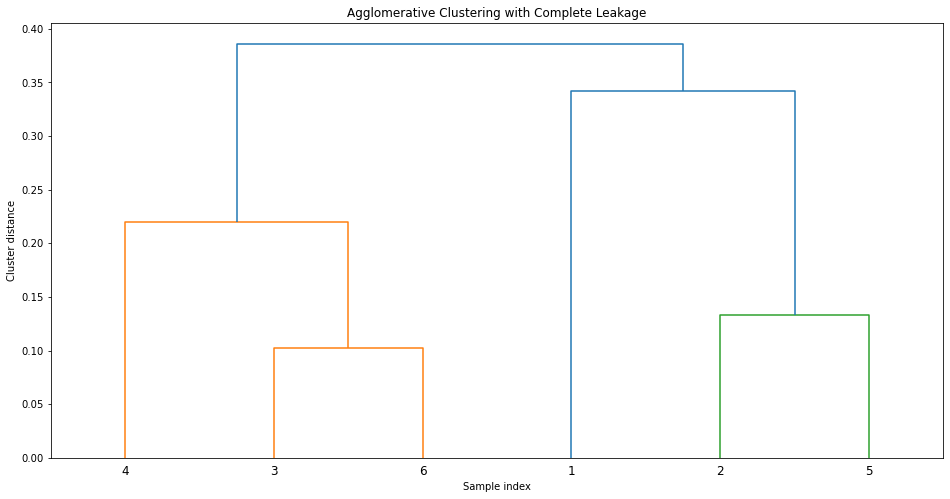

In [5]:
#play with method='single', 'complete', 'average', ’ward’
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


fig = plt.figure(figsize=(16, 8))

Z = linkage(df, method='complete', metric='euclidean')
dn = dendrogram(Z,labels=np.arange(1,7))
plt.title("Agglomerative Clustering with Complete Leakage")
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show();

| ![space-1.jpg](img/linkage2.png) |
|:--:|
| <b>Complete Link Clustering</b>|

### `Average linkage`

- `Average linkage` defines the **distance between two clusters** as the average distance between their observations. For that reason, it computes all pairwise dissimilarities between the observations in two clusters, and record the **average** of these  dissimilarities. 

     - For example, we have now four clusters above: {3, 6}, {2,5}, {1}, and {4}. Let's calculate the `average linkage` between the cluster {3, 6} and the other three clusters, respectively: 
     
        - **dist({3,6}, {2,5})**: $avg(dist(3,2),dist(3,5),dist(6,2),dist(6,5))=avg(0.15,0.28,0.25,0.39)=0.35$
        - **dist({3,6}, {4})**: $avg(dist(3,4),dist(6,4))=avg(0.16,0.22)=0.19$
        - **dist({3,6}, {1})**: $avg(dist(3,1),dist(6,1))=avg(0.22, 0.24)=0.23$
        
- Then, `average linkage` merges two clusters that have **the smallest average linkage**.  

     - In this example, since the average linkage value between is the cluster {3,6} and the cluster {4} is the **minimum**, we merge these two clusters into a cluster. Furthermore, notice that the height at which they are joined into one cluster in dendogram is 0.19.  

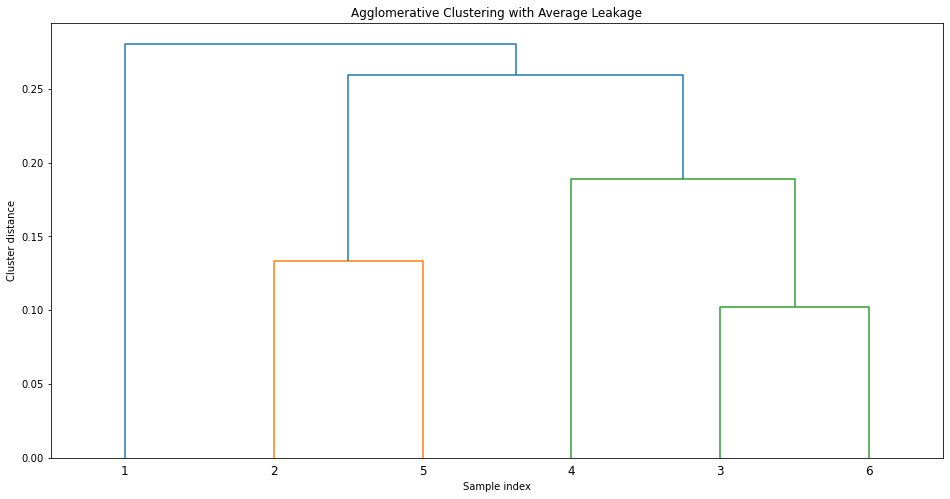

In [6]:
#play with method='single', 'complete', 'average', ’ward’
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


fig = plt.figure(figsize=(16, 8))

Z = linkage(df, method='average', metric='euclidean')
dn = dendrogram(Z,labels=np.arange(1,7))
plt.title("Agglomerative Clustering with Average Leakage")
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show();

| ![space-1.jpg](img/linkage2.png) |
|:--:|
| <b>Average Link Clustering</b>|

### `Ward's Method`

- `Ward's Method` computes how much the **sum of squares will increase** when we merge two clusters $C_1$ and $C_2$:


$$
\begin{equation}
\Delta(C_1,C_2)=\sum_{i \in C_1 \cup C_2}\vert \vert \mathbf{x}_{i}-\boldsymbol{\mu}_{C_1 \cup C_2} \vert \vert^2_2- \sum_{i \in C_1 }\vert \vert \mathbf{x}_{i}-\boldsymbol{\mu}_{C_1} \vert \vert^2_2- \sum_{i \in C_2 }\vert \vert \mathbf{x}_{i}-\boldsymbol{\mu}_{C_2} \vert \vert^2_2, \nonumber
\end{equation}
$$

- where $\boldsymbol{\mu}_{C_1 \cup C_2}$ is the center of merged cluster, $\boldsymbol{\mu}_{C_1}$ is the center of the first cluster, and $\boldsymbol{\mu}_{C_2}$ is the center of the second cluster. $\Delta(C_1,C_2)$ is called the `merging cost` of combining the clusters $C_1$ and $C_2$.

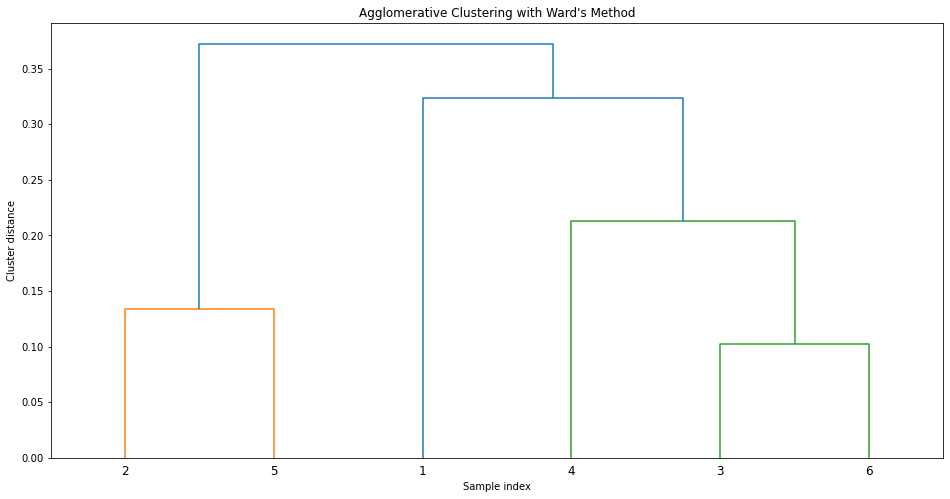

In [7]:
#play with method='single', 'complete', 'average', ’ward’
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


fig = plt.figure(figsize=(16, 8))

Z = linkage(df, method='ward', metric='euclidean')
dn = dendrogram(Z,labels=np.arange(1,7))
plt.title("Agglomerative Clustering with Ward's Method")
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show();

| ![space-1.jpg](img/linkage4.png) |
|:--:|
| <b>Ward's Clustering</b>|

- We have now three clusters depending on the linkage type we have used. 
- **We should proceed the algorithm untill all n observations belong to one single cluster and the dendogram is complete.**

### Agglomerative Clustering on Human Development Index (HDI)

- The United Nations (UN) maintains an [index](https://hdr.undp.org/data-center/documentation-and-downloads) for 191 countries describing the overall level of human development of each country based on three pillars: health, education, and standard of living. Specifically, the human developlment index (HDI) dataset is based on:

  - Life expectancy at birth,
  - Expected years of schooling,
  - Mean years of schooling, and
  - Gross national income.

<br>
<br>

![](img/hdi.png)

<br>
<br>


- The HDI score describes the overall strength of human development in a country.  The UN classifies the countries into four groups based on HDI scores as follows:


|UN Classification             | HDI             | 
|------------------------------|-----------------|
| Very high human development  | 0.800 and above | 
| High human development       | 0.700–0.799     | 
| Medium human development     | 0.550–0.699     |  
| Low human development        | Below 0.550     |  

- Our interest in this example to **find the countries** which are similar in terms of health, education, and standard of living. We can do this via clustering.
- Let's read the data and take a look at the top and bottom countries in terms of HDI scores.

In [8]:
#required libraries
import pandas as pd
df = pd.read_excel('datasets/hdi.xlsx', index_col=0, header=0).round(2)

In [9]:
#let's see top 15 countries in terms of HDI values
df.head(15)

,hdi,life_exp,exp_school,mean_school,gni_capta
Country,,,,,
Switzerland,0.96,83.99,16.50,13.86,66933.00
Norway,0.96,83.23,18.19,13.00,64660.11
Iceland,0.96,82.68,19.16,13.77,55782.05
"Hong Kong, China (SAR)",0.95,85.47,17.28,12.23,62606.85
Australia,0.95,84.53,21.05,12.73,49238.43
Denmark,0.95,81.38,18.71,12.96,60364.79
Sweden,0.95,82.98,19.42,12.61,54489.37
Ireland,0.94,82.00,18.95,11.58,76168.98
Germany,0.94,80.63,17.01,14.09,54534.22


In [10]:
#let's see bottom 10 countries in terms of HDI values
df.tail(10)

,hdi,life_exp,exp_school,mean_school,gni_capta
Country,,,,,
Guinea,0.46,58.89,9.81,2.20,2480.89
Yemen,0.46,63.75,9.10,3.20,1314.27
Burkina Faso,0.45,59.27,9.14,2.11,2117.92
Mozambique,0.45,59.32,10.22,3.20,1198.07
Mali,0.43,58.94,7.42,2.31,2132.63
Burundi,0.43,61.66,10.72,3.13,731.79
Central African Republic,0.40,53.89,8.04,4.33,966.06
Niger,0.40,61.58,6.96,2.12,1239.87
Chad,0.39,52.53,8.04,2.57,1364.17


In [11]:
df.shape

(191, 5)

In [12]:
df.loc[["Türkiye"]]

,hdi,life_exp,exp_school,mean_school,gni_capta
Country,,,,,
Türkiye,0.84,76.03,18.34,8.63,31032.8


For illustration, let's apply agglomerative clustering to find sub-groups of countries. We need to **standardize** the numerical features before clustering.

In [13]:
from sklearn import set_config
set_config(transform_output="pandas") 

In [14]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["hdi"])

X_sd = StandardScaler().fit_transform(X)

X_sd.head()

,life_exp,exp_school,mean_school,gni_capta
Country,,,,
Switzerland,1.662355,1.016832,1.539628,2.144605
Norway,1.562698,1.596364,1.267916,2.040191
Iceland,1.490578,1.928994,1.511193,1.632343
"Hong Kong, China (SAR)",1.856424,1.284308,1.024638,1.945867
Australia,1.733164,2.577109,1.182610,1.331737


Let's draw a dendrogram with Ward's method first.

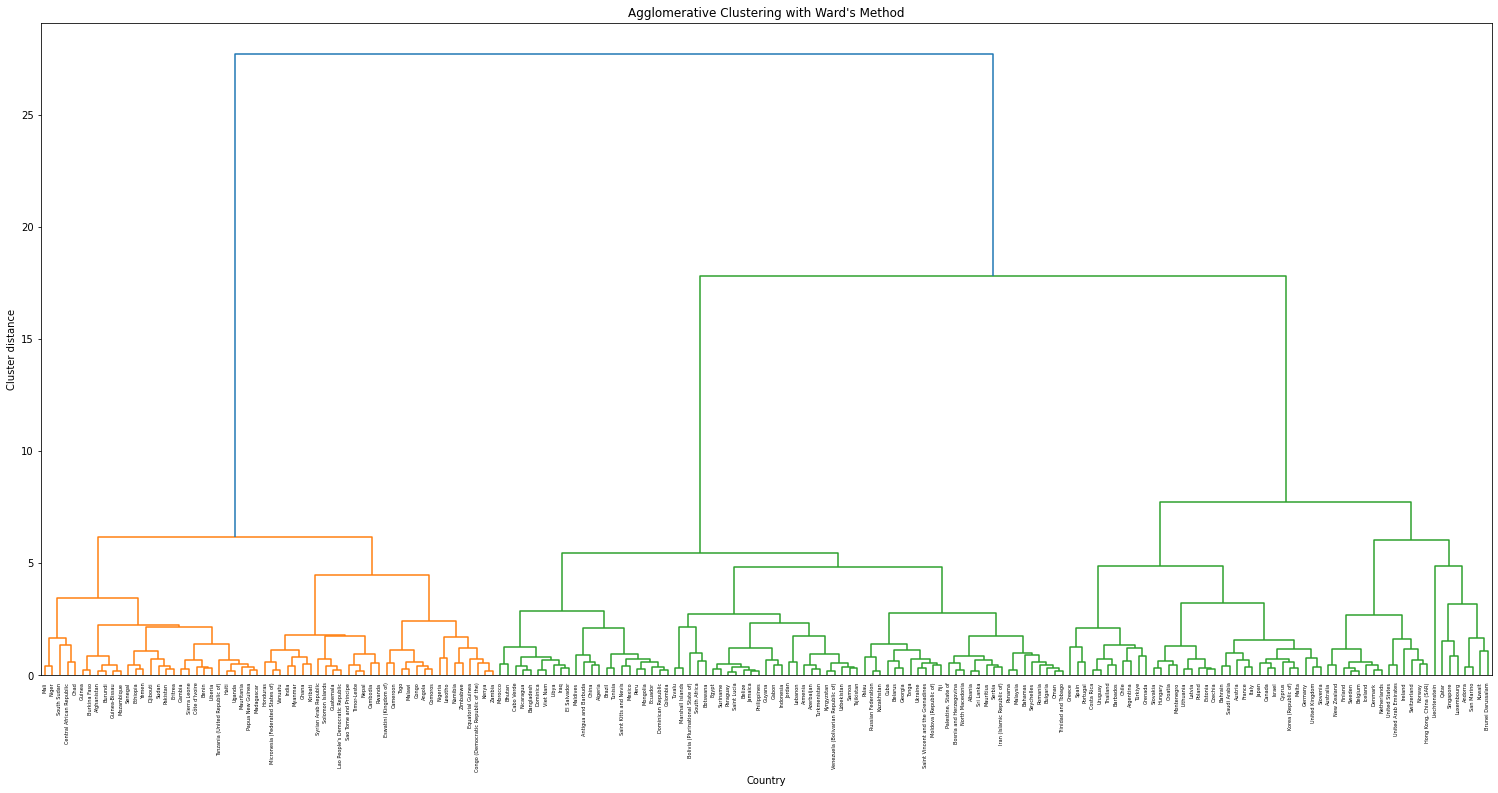

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(26, 12))

Z = linkage(X_sd, method='ward', metric='euclidean')
dn = dendrogram(Z,labels=X_sd.index)
plt.title("Agglomerative Clustering with Ward's Method")
#plt.axhline(y = 19, color = 'black', linestyle = '--')
#plt.axhline(y = 10, color = 'r', linestyle = '--')
plt.xlabel("Country")
plt.ylabel("Cluster distance")
plt.show();

- When we look at the dendogram, we can see that there are two main branches, where the branch on the left are **low development** countries and the right branch are the **medium-to-high development** countries. 
- By looking at the height of the fusion, we can see that countries with low development values are far behind those in the medium and high development.
- In order to identify the clusters, we need to **make a horizontal cut across** the dendogram. The distinct sets of observations under the cut can be interpreted as clusters.
- In this sense, cutting the dendogram at a height of 19 results in two clusters (lower and higher human development), whereas cutting the dendogram at a height of 10 results in three clusters (lower, medium, and higher human development). 

* We can also focus on a subset of this data set to better see the country names.

In [16]:
#subset
df1 = X_sd.sample(n = 50, random_state=1773)

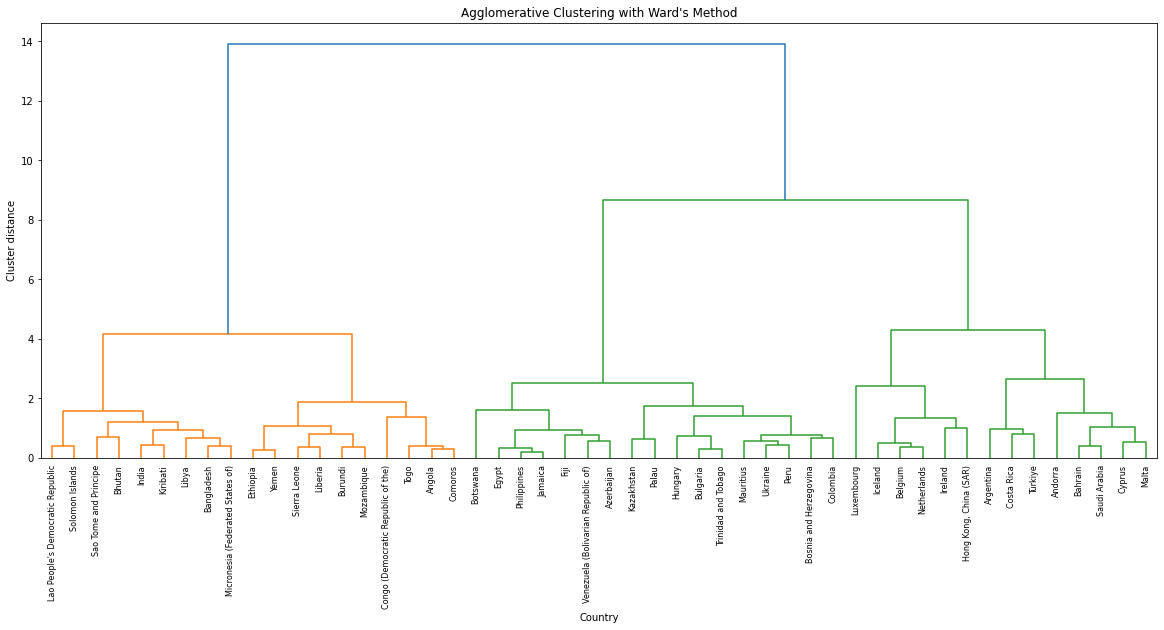

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(20, 8))

Z = linkage(df1, method='ward', metric='euclidean')
dn = dendrogram(Z,labels=df1.index)
plt.title("Agglomerative Clustering with Ward's Method")
plt.xlabel("Country")
plt.ylabel("Cluster distance")
plt.show();

- In the dendrogram we see a group of countries located far from each other on the globe but clustered together tightly in our tree diagram such as Argentina and Turkey.
- In the table below we can see that Argentina and Türkiye have high life expectancy and education but low gross national income (compared to USA).

In [18]:
df.loc[["Argentina", "Türkiye", "United States"]]

,hdi,life_exp,exp_school,mean_school,gni_capta
Country,,,,,
Argentina,0.84,75.39,17.87,11.15,20925.27
Türkiye,0.84,76.03,18.34,8.63,31032.80
United States,0.92,77.20,16.28,13.68,64765.22


## Hierarchically Clustered Heatmap

-  The `clustermap` from Seaborn library is very similar to the heatmap function, but it also represents a hierarchically-cluster of the rows and the columns of the data.

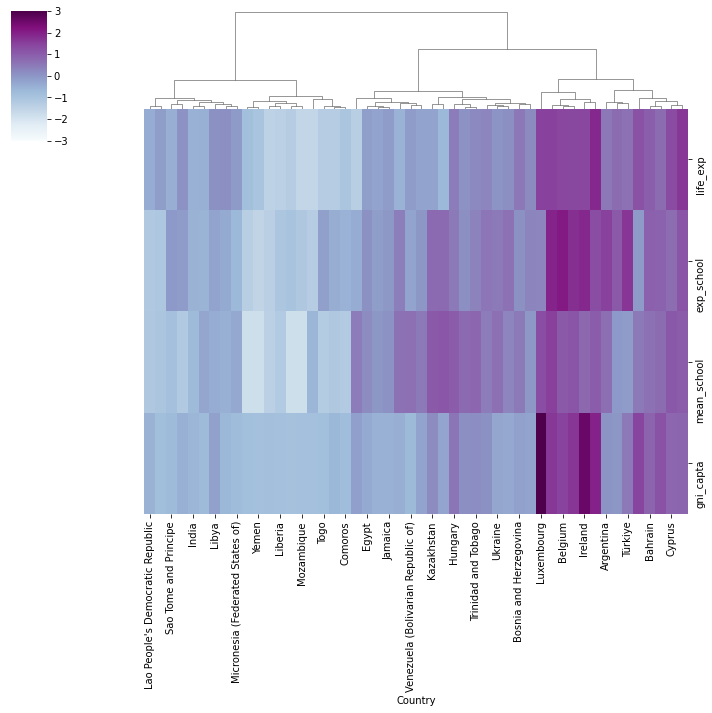

In [19]:
import seaborn as sns

sns.clustermap(df1.T, method='ward', metric='euclidean', row_cluster=False, cmap = 'BuPu', vmin = -3, vmax = 3) 
plt.show();

- Here, we can see that there are three main sub-groups:

   1) The countries with low mean school year, expected school year, gni, and life expactancy.
   2) The countries with medium mean school year, expected school year, gni, and life expactancy.
   3) The countries with high mean school year, expected school year, gni, and life expactancy.
   
- We can also see that Luxembourg stands out by itsef with its high gross national income.   

## Agglomerative Clustering Implementation

- We can implement `Agglomerative Clustering` in [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) class of scikit-learn's cluster submodule. 
- The main arguments are:

   - `n_clusters:` The number of clusters to find. 
   - `linkage:` Which linkage criterion to use among {‘ward’, ‘complete’, ‘average’, ‘single’}. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

In [20]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X_sd)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

We can also compute the Silhouette score of the algorithm and use this score for comparison with other clustering algorithms.

In [21]:
from sklearn.metrics import silhouette_score

print("Silhouette Score %.4f:" % silhouette_score(X_sd, y_hc))

Silhouette Score 0.3978:


## Reference

- James, G., Witten, D., Hastie, T., and Tibshirani, R. (2021). An Introduction to Statistical Learning: With Applications in R. New York: Springer.
- Tan, P. N., Steinbach, M., & Kumar, V. (2016). Introduction to Data Mining. Pearson Education India.
- https://hdr.undp.org/data-center/documentation-and-downloads
- https://dai-global-digital.com/data-mining-and-the-human-development-index.html
- https://ubc-cs.github.io/cpsc330/lectures/16_DBSCAN-hierarchical.html#hierarchical-clustering-video
- https://www.stat.cmu.edu/~cshalizi/350/lectures/08/lecture-08.pdf

In [22]:
import session_info
session_info.show()